## Praktikum 5

### Langkah 0 - Import Library

In [2]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [3]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

### Langkah 1 - Load Data & Visualisasikan

In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [5]:
# Load training data
train_img = load_dataset(train_dir)

In [6]:
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

In [7]:
pick_random = np.random.randint(0, len(train_img))

print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 63
(469, 640, 3)


In [8]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (439, 640, 3)
Label	: images\training\day


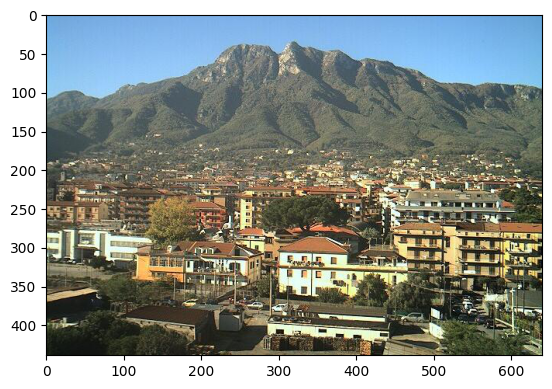

In [9]:
random_img_viz(train_img)

### Langkah 3 - Pra Pengolahan Data

In [10]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [11]:
def label_encoder(label):
    num_val = 0
    if(label == 'day'):
        num_val = 1

    return num_val

In [12]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    
    return std_img_list

In [13]:
train_std_img_list = preprocess(train_img)

In [14]:
pick_random = np.random.randint(0, len(train_std_img_list))

print(f'Image {pick_random}')
print(train_std_img_list[pick_random] [0].shape)

Image 31
(600, 1100, 3)


### Langkah 4 - Ekstraksi Fitur

In [15]:
def avg_brightness(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(img_hsv[:,:,2])
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 67
Avg Brigthness: 136.8724


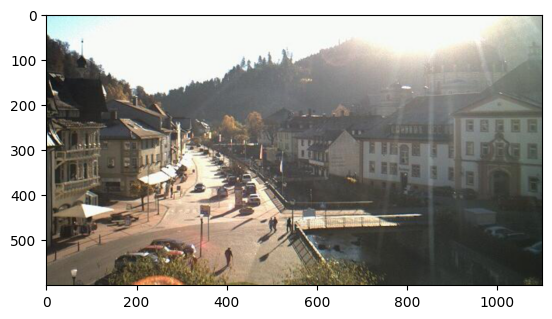

In [16]:
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brigthness: {avg_img:.4f}')
plt.imshow(feature_img)

### Langkah 5 - Klasifikasi dengan Metode Threshold

In [17]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0

    if avg > threshold:
        pred = 1
    return pred

Image 203
Actual label: 0
Predicted label: 0


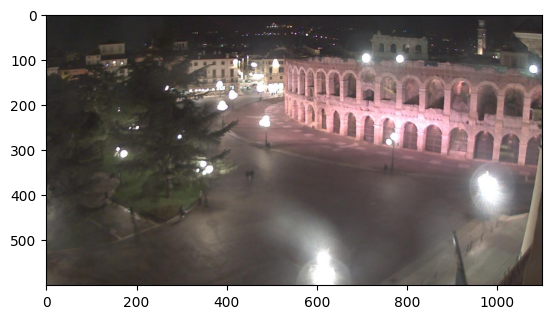

In [18]:
rand_img = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[rand_img][0], threshold = 120)

print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Langkah 6 - Evaluasi (Manual)

In [19]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        img = file[0]
        label = file[1]

        pred_label = predict_label(img, threshold)

        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [20]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.6583


In [21]:
test_img = load_dataset(test_dir)

test_std_img_list = preprocess(test_img)


evaluate(test_std_img_list, threshold=120)

Accuracy: 0.6062


Langkah 4 Alternatif - Membuat Feature Vectors

In [22]:
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) 
        img_label = img[1] 

        avg_list.append(img_avg)
        labels.append(img_label)
    
    data = np.column_stack((avg_list, labels))
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [23]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,0.0
1,192.954773,0.0
2,132.141432,0.0
3,199.784797,0.0
4,109.964702,0.0


In [31]:
# Import library tambahan
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (train_avg_img dihasilkan dari fungsi extract_avg_bright_feature)
X = train_avg_img[['AVG_BRIGHT']]  # Fitur rata-rata kecerahan
y = train_avg_img['LABELS']  # Label

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Latih model menggunakan data training
svm_model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = svm_model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model SVM: {accuracy:.4f}')


ValueError: The number of classes has to be greater than one; got 1 class